# Making a Loan Prediction Model
**Using a loan dataset from kaggle to train the model**

In [1]:
# Importing needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
# importing the dataset
loan_data = pd.read_csv('Loan_Dataset.csv')

In [3]:
# checking the first 5 records in the dataset
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# checking the last 5 records in the dataset
loan_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
# checking for more information on the dataset
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# above we see that the shape is (614, 13)
# lets get some more descriptions on the dataset
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# checking for rows with null values and thier total number
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# dropping all the rows with null values
loan_data.dropna(inplace=True) # using inplace=True, makes sure the effect happens to the orginal dataset

In [9]:
# Verifying the effect
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Creating a List with categorical predictors

In [10]:
# to see all columns
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
#checking the dataset data types
loan_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [12]:
Categorical = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
Encode = LabelEncoder() # initiating lable encoder to use numerical datas, because machine learning works best with numbers

In [13]:
# making a loop to transform 'Categorical' to numeric values
for i in Categorical:
    loan_data[i] = Encode.fit_transform(loan_data[i])

In [14]:
# cross checking the datatypes
loan_data.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [15]:
# Converting some columns into an array
LoanAmount = loan_data['LoanAmount'].values
Credit_History = loan_data['Credit_History'].values
Loan_Status = loan_data['Loan_Status'].values

## Visualization

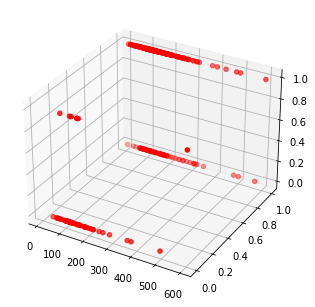

In [16]:
# using scatter plots
Axes3D(plt.figure()).scatter(LoanAmount, Credit_History, Loan_Status, color='r') # r color means red.

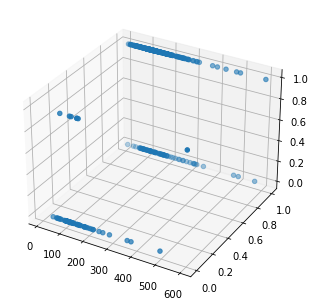

In [17]:
# or you can split the above code into 3 lines for easier understanding
fig = plt.figure()
axes = Axes3D(fig)
axes.scatter(LoanAmount, Credit_History, Loan_Status)

### Generating parameters (theta values)

In [18]:
u = len(LoanAmount)
ones = np.ones(u)
x = np.array([ones, LoanAmount, Credit_History]).T

# Initial Coefficients
a = np.array([0, 0, 0])
y = np.array(Loan_Status)
alpha = 0.0001

In [19]:
# defining the cost function
def cost(x, y, a):
    n = len(y)
    z = np.sum((x.dot(a) - y) ** 2) / (2 * n)
    return z
initial_cost = cost(x, y, a)
print(f'Initial Cost is {initial_cost}')

Initial Cost is 0.3458333333333333


###  Gradient Descent

In [20]:
def gradient_descent(x, y, a, alpha, iterations):
    cost_history = [0] * iterations
    n = len(y)
    
    for iteration in range(iterations):
        
        # Hypothesis Values
        h = x.dot(a)
        
        # Diff between Actual Y and Hypothesis
        loss = h - y
        
        # Calculating gradient
        gradient = x.T.dot(loss) / n
        
        # Changing Values of b using Gradient
        a = a - alpha * gradient
        
        # New Cost
        cost_a = cost(x, y, a)
        cost_history[iteration] = cost_a
        
    return a, cost_history

In [21]:
# Iterating 100 records
new_a, cost_history = gradient_descent(x, y, a, alpha, 100)
print(f'New Coefficients are {new_a}')

New Coefficients are [-2.35730791e+19 -4.46524650e+21 -1.99469455e+19]


In [22]:
# final cost of new_a
print(f'Final Cost is {cost_history[-1]}')

Final Cost is 2.733461001118079e+47


### RMSE - Model Evaluation

In [23]:
def RMSE(y, y_pred):
    RMSE = np.sqrt(sum((y - y_pred) ** 2) / len(y))
    return RMSE

### R2 Score - Model Evaluation

In [24]:
def R2_Score(y, y_pred):
    mean_y = np.mean(y)
    total = sum((y - mean_y) ** 2)
    res = sum((y - y_pred) ** 2)
    R2 = 1 - (res / total)
    return R2

y_pred = x.dot(new_a)

# outputing RMSE and R2 Score Evaluation
print(f'RMSE is: {RMSE(y, y_pred)}')
print(f'R2 Score is: {R2_Score(y, y_pred)}')

RMSE is: 7.393863673503969e+23
R2 Score is: -2.5634541462780895e+48


### Linear Regression 

In [25]:
# Assigning X and Y Values
X = np.array([LoanAmount, Credit_History]).T
y = np.array(Loan_Status)

In [26]:
# Splitting Data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.69, random_state=10)

In [27]:
# checking the test/train
X_test

array([[ 80.,   1.],
       [112.,   1.],
       [205.,   1.],
       [500.,   1.],
       [109.,   1.],
       [160.,   1.],
       [152.,   0.],
       [123.,   1.],
       [ 74.,   1.],
       [ 88.,   1.],
       [100.,   1.],
       [154.,   1.],
       [103.,   0.],
       [275.,   1.],
       [ 70.,   1.],
       [ 46.,   1.],
       [125.,   1.],
       [110.,   1.],
       [ 56.,   1.],
       [290.,   1.],
       [127.,   0.],
       [120.,   1.],
       [ 65.,   1.],
       [115.,   1.],
       [110.,   1.],
       [239.,   1.],
       [102.,   0.],
       [ 96.,   1.],
       [260.,   1.],
       [165.,   1.],
       [ 44.,   1.],
       [236.,   1.],
       [167.,   1.],
       [143.,   1.],
       [175.,   1.],
       [106.,   1.],
       [ 96.,   1.],
       [ 50.,   1.],
       [ 96.,   1.],
       [120.,   1.],
       [108.,   1.],
       [300.,   1.],
       [152.,   1.],
       [120.,   1.],
       [ 99.,   0.],
       [146.,   0.],
       [137.,   1.],
       [ 84.,

In [28]:
X_train

array([[ 48.,   1.],
       [100.,   1.],
       [108.,   1.],
       [225.,   1.],
       [140.,   1.],
       [110.,   1.],
       [126.,   0.],
       [144.,   1.],
       [113.,   1.],
       [111.,   1.],
       [187.,   1.],
       [ 90.,   1.],
       [100.,   1.],
       [100.,   1.],
       [120.,   1.],
       [185.,   1.],
       [ 96.,   1.],
       [151.,   1.],
       [160.,   1.],
       [ 25.,   1.],
       [200.,   1.],
       [100.,   1.],
       [187.,   1.],
       [121.,   1.],
       [140.,   1.],
       [210.,   1.],
       [ 80.,   1.],
       [160.,   1.],
       [112.,   1.],
       [ 81.,   1.],
       [ 55.,   1.],
       [ 30.,   1.],
       [ 97.,   1.],
       [185.,   1.],
       [135.,   1.],
       [161.,   0.],
       [243.,   1.],
       [ 99.,   1.],
       [137.,   0.],
       [168.,   1.],
       [110.,   1.],
       [400.,   1.],
       [112.,   1.],
       [156.,   1.],
       [315.,   1.],
       [115.,   1.],
       [120.,   1.],
       [187.,

In [29]:
# no need to check for y because its similar

# Initializing Model
regree = LinearRegression()

# Fitting X and y
regree.fit(X_train, y_train)

LinearRegression()

In [30]:
# checking intercept
regree.intercept_

0.15598631375217675

In [31]:
# checking coefficient 
regree.coef_

array([-1.51969616e-04,  6.57916921e-01])

In [32]:
# predicting the X_test
pred = regree.predict(X_test)
pred

array([0.80174567, 0.79688264, 0.78274946, 0.73791843, 0.79733855,
       0.7895881 , 0.13288693, 0.79521097, 0.80265748, 0.80052991,
       0.79870627, 0.79049991, 0.14033344, 0.77211159, 0.80326536,
       0.80691263, 0.79490703, 0.79718658, 0.80539294, 0.76983205,
       0.13668617, 0.79566688, 0.80402521, 0.79642673, 0.79718658,
       0.7775825 , 0.14048541, 0.79931415, 0.77439114, 0.78882825,
       0.80721657, 0.77803841, 0.78852431, 0.79217158, 0.78730855,
       0.79779446, 0.79931415, 0.80630475, 0.79931415, 0.79566688,
       0.79749052, 0.76831235, 0.79080385, 0.79566688, 0.14094132,
       0.13379875, 0.7930834 , 0.80113779, 0.78837234, 0.80326536,
       0.79186764, 0.79673067, 0.8015937 , 0.78715658, 0.79232355,
       0.79718658, 0.78229356, 0.79095582, 0.80782445, 0.7865487 ,
       0.79414719, 0.13197511, 0.79034794, 0.79201961, 0.78928416,
       0.80174567, 0.78138174, 0.7880684 , 0.79277946, 0.78533295,
       0.79566688, 0.79049991, 0.80387324, 0.14185314, 0.78715

### Evaluating the Model

In [33]:
# checking mean squared error
np.sqrt(mean_squared_error(y_test, pred))

0.3810475345197588

In [34]:
# checking the accuracy of the model
regree.score(X_test, y_test)

0.3022676276330759